In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

### Data cleaning

In [2]:
df = pd.read_csv("kc_house_data.csv")
df.head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
# Đặc điểm vật lý của nhà:

# bedrooms: Số phòng ngủ
# bathrooms: Số phòng tắm (có thể là số thập phân, ví dụ: 2.5 = 2 phòng tắm đầy đủ + 1 phòng vệ sinh)
# sqft_living: Diện tích không gian sống bên trong (tính bằng feet vuông)
# sqft_lot: Diện tích lô đất (tính bằng feet vuông)
# floors: Số tầng của ngôi nhà
# sqft_above: Diện tích phần trên mặt đất (không bao gồm tầng hầm)
# sqft_basement: Diện tích tầng hầm

# Chất lượng và tình trạng:

# waterfront: Nhà có view/giáp mặt nước không (0 = không, 1 = có)
# view: Chất lượng tầm nhìn từ nhà (thang điểm từ 0-4)
# condition: Tình trạng tổng thể của ngôi nhà (thang điểm từ 1-5)
# grade: Mức độ xây dựng và thiết kế (thang điểm từ 1-13, dựa trên chất lượng vật liệu và thiết kế)

# Thông tin thời gian:

# yr_built: Năm xây dựng ngôi nhà
# yr_renovated: Năm cải tạo (0 nếu chưa từng được cải tạo)

# Vị trí địa lý:

# zipcode: Mã bưu chính
# lat: Vĩ độ
# long: Kinh độ

# Thông tin khu vực lân cận:

# sqft_living15: Diện tích trung bình không gian sống của 15 căn nhà gần nhất
# sqft_lot15: Diện tích trung bình lô đất của 15 căn nhà gần nhất

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [4]:
df.drop(columns=["id", "date"], inplace=True)

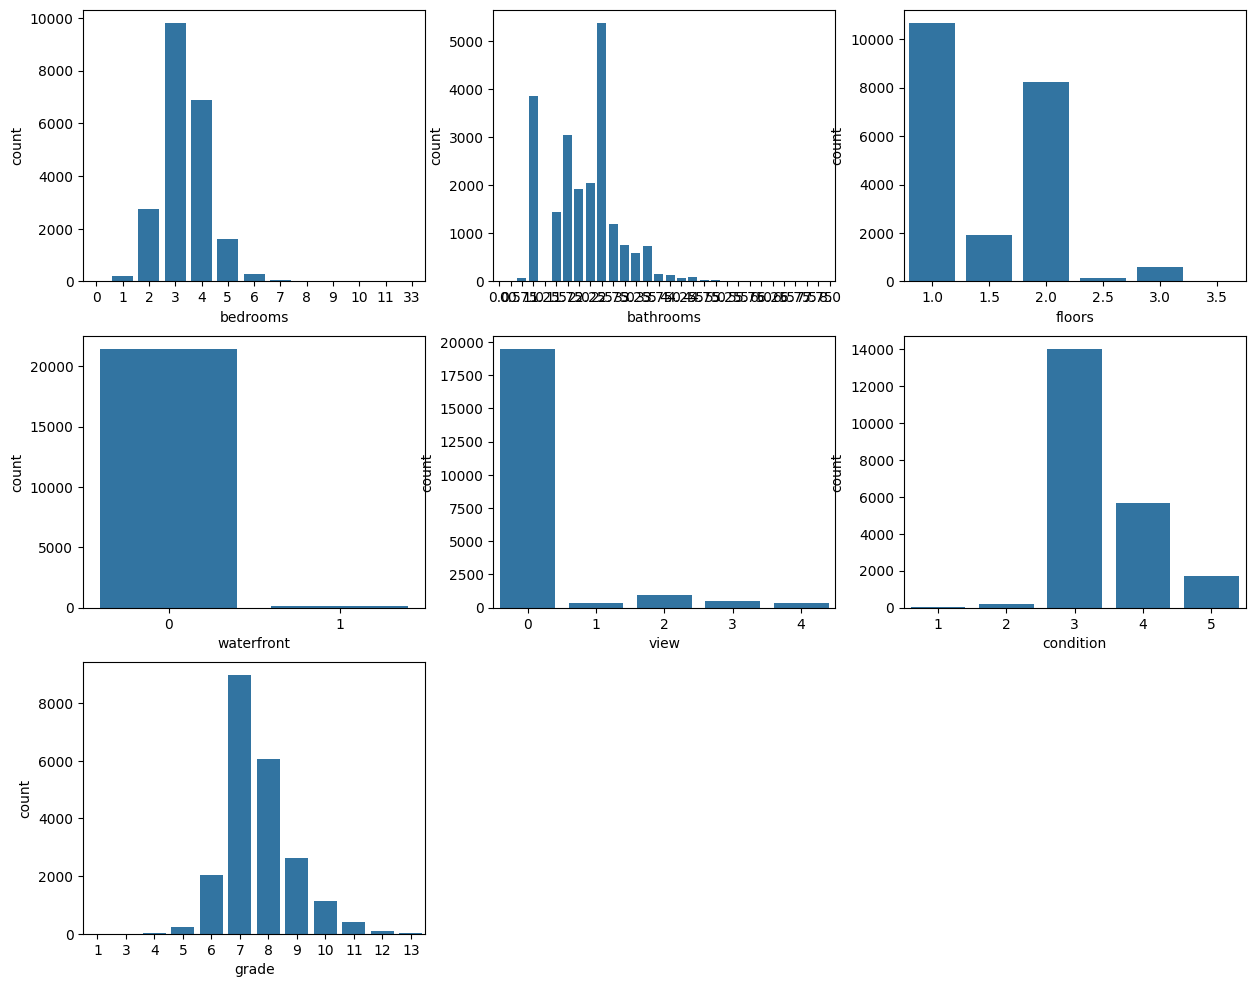

In [19]:
categories_columns = ["bedrooms", "bathrooms", "floors", "waterfront", "view", "condition", "grade"]
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))
axes = axes.flatten()

for i, col in enumerate(categories_columns):
    sns.countplot(data=df, x=col, ax=axes[i])

for j in range(i+1, len(axes)):
    axes[j].set_visible(False)

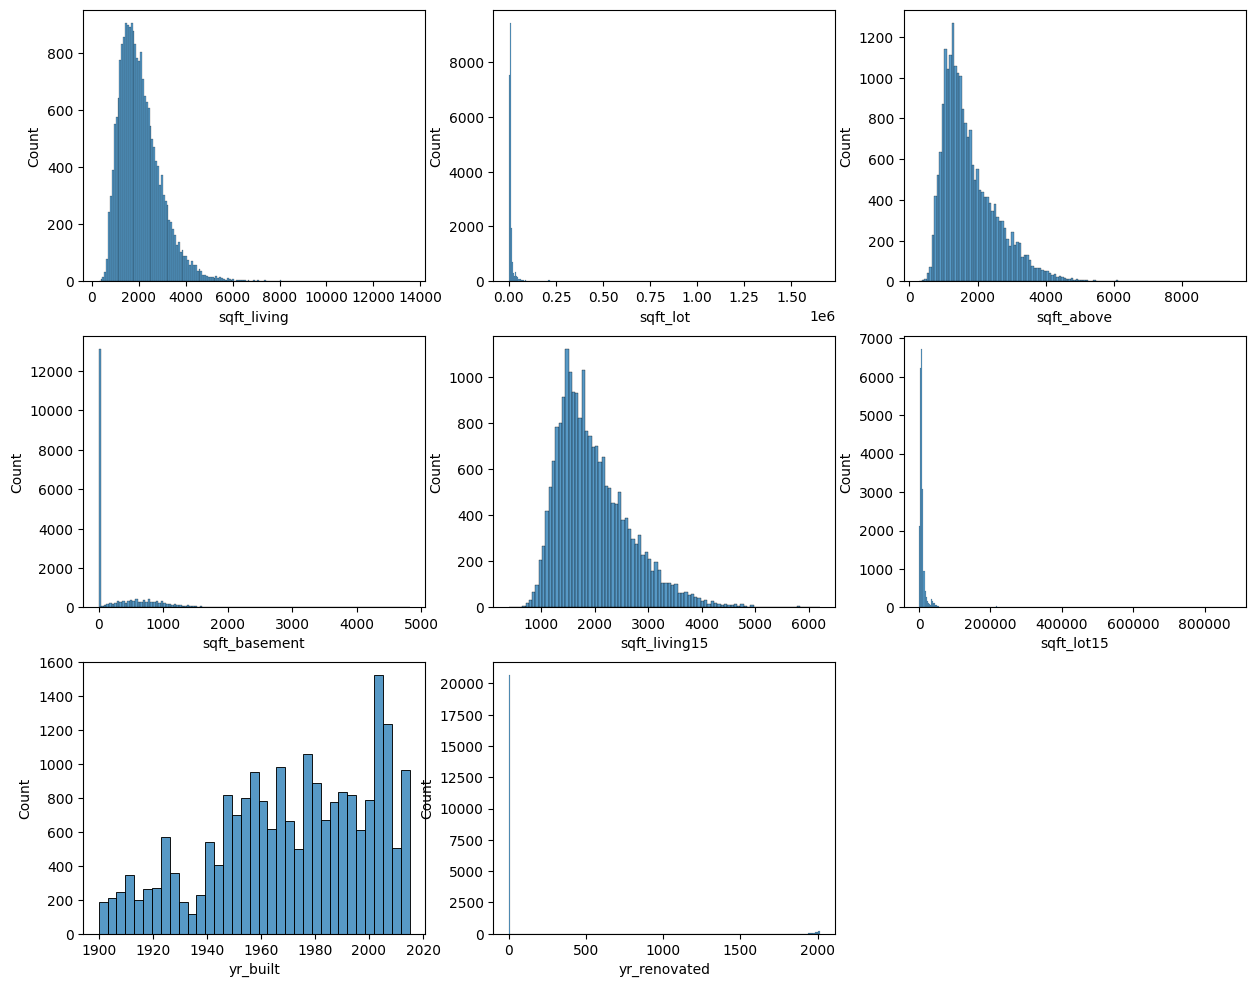

In [ ]:
numerical_columns = ["sqft_living", "sqft_lot", "sqft_above", "sqft_basement", "sqft_living15", "sqft_lot15", "yr_built", "yr_renovated"]
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))
axes = axes.flatten()

for i, col in enumerate(numerical_columns):
    sns.histplot(data=df, x=col, ax=axes[i])

for j in range(i+1, len(axes)):
    axes[j].set_visible(False)

# sqft_living: Diện tích không gian sống bên trong (tính bằng feet vuông)
# sqft_lot: Diện tích lô đất (tính bằng feet vuông)
# sqft_above: Diện tích phần trên mặt đất (không bao gồm tầng hầm)
# sqft_basement: Diện tích tầng hầm
# sqft_living15: Diện tích trung bình không gian sống của 15 căn nhà gần nhất
# sqft_lot15: Diện tích trung bình lô đất của 15 căn nhà gần nhất
# yr_built: Năm xây dựng ngôi nhà
# yr_renovated: Năm cải tạo (0 nếu chưa từng được cải tạo)

<Axes: xlabel='long', ylabel='lat'>

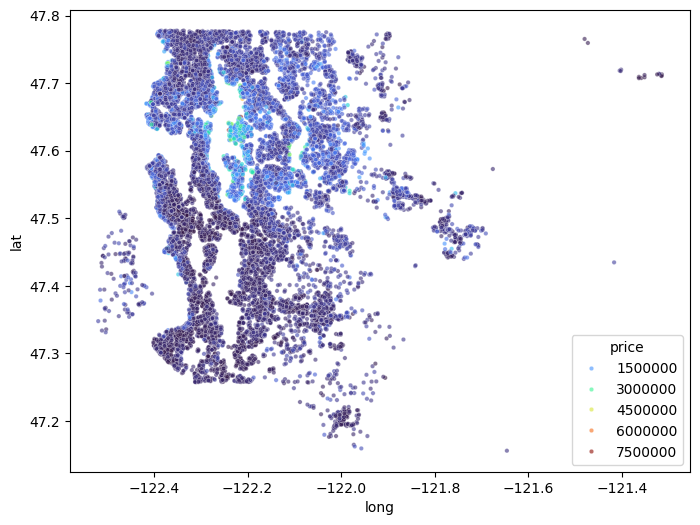

In [38]:
plt.figure(figsize=(8, 6))

sns.scatterplot(data=df, x="long", y="lat", hue="price", 
                palette="turbo", alpha=0.6, s=10)

<Axes: >

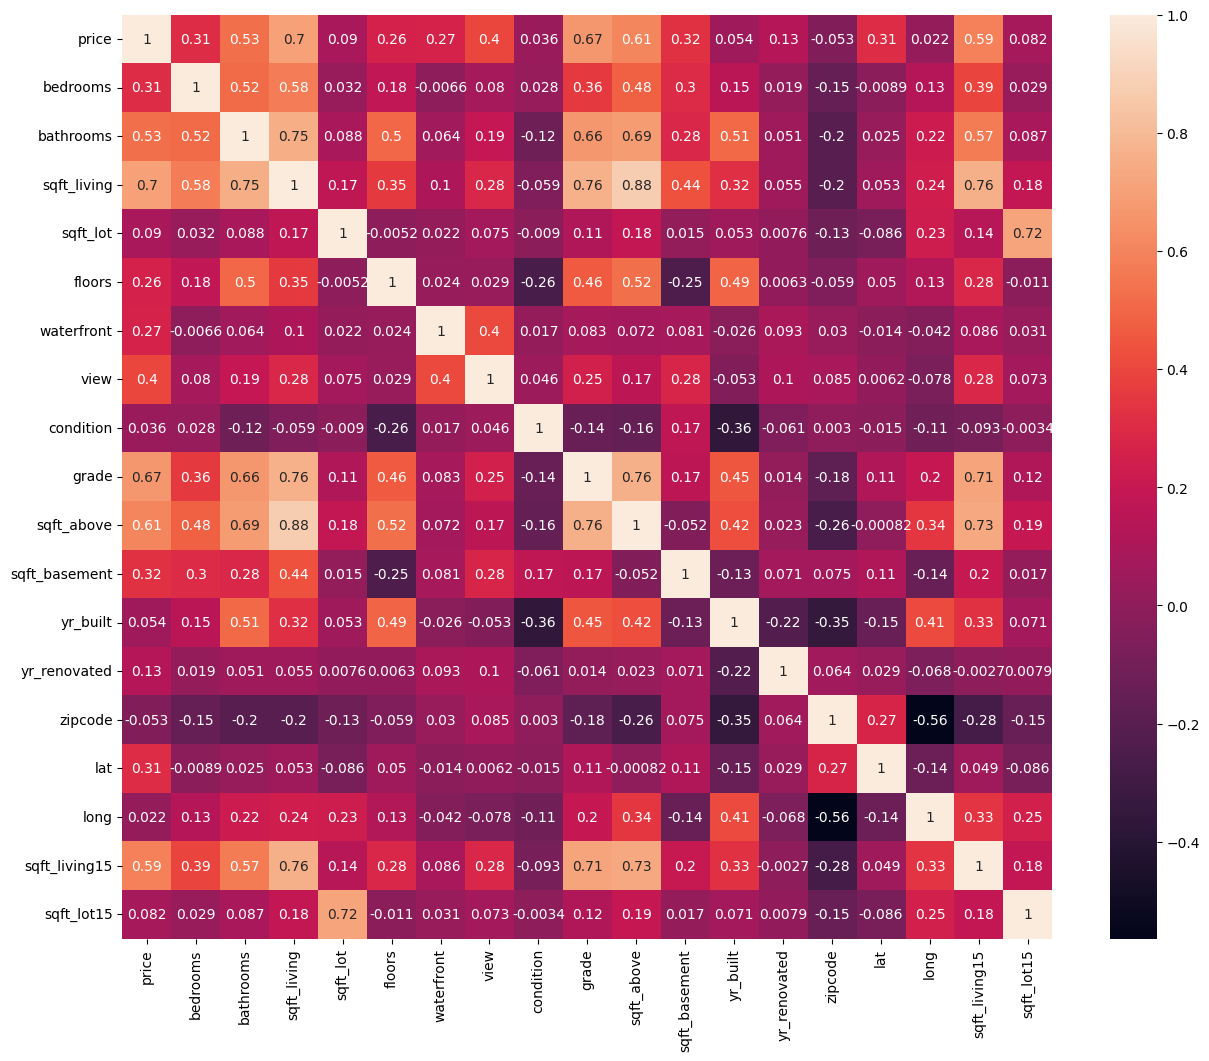

In [42]:
plt.figure(figsize=(15, 12))
sns.heatmap(data=df.corr(numeric_only=True), annot=True)

In [ ]:
# Đặc điểm vật lý của nhà:

# bedrooms: Số phòng ngủ
# bathrooms: Số phòng tắm (có thể là số thập phân, ví dụ: 2.5 = 2 phòng tắm đầy đủ + 1 phòng vệ sinh)
# sqft_living: Diện tích không gian sống bên trong (tính bằng feet vuông)
# sqft_lot: Diện tích lô đất (tính bằng feet vuông)
# floors: Số tầng của ngôi nhà
# sqft_above: Diện tích phần trên mặt đất (không bao gồm tầng hầm)
# sqft_basement: Diện tích tầng hầm

# Chất lượng và tình trạng:

# waterfront: Nhà có view/giáp mặt nước không (0 = không, 1 = có)
# view: Chất lượng tầm nhìn từ nhà (thang điểm từ 0-4)
# condition: Tình trạng tổng thể của ngôi nhà (thang điểm từ 1-5)
# grade: Mức độ xây dựng và thiết kế (thang điểm từ 1-13, dựa trên chất lượng vật liệu và thiết kế)

# Thông tin thời gian:

# yr_built: Năm xây dựng ngôi nhà
# yr_renovated: Năm cải tạo (0 nếu chưa từng được cải tạo)

# Vị trí địa lý:

# zipcode: Mã bưu chính
# lat: Vĩ độ
# long: Kinh độ

# Thông tin khu vực lân cận:

# sqft_living15: Diện tích trung bình không gian sống của 15 căn nhà gần nhất
# sqft_lot15: Diện tích trung bình lô đất của 15 căn nhà gần nhất


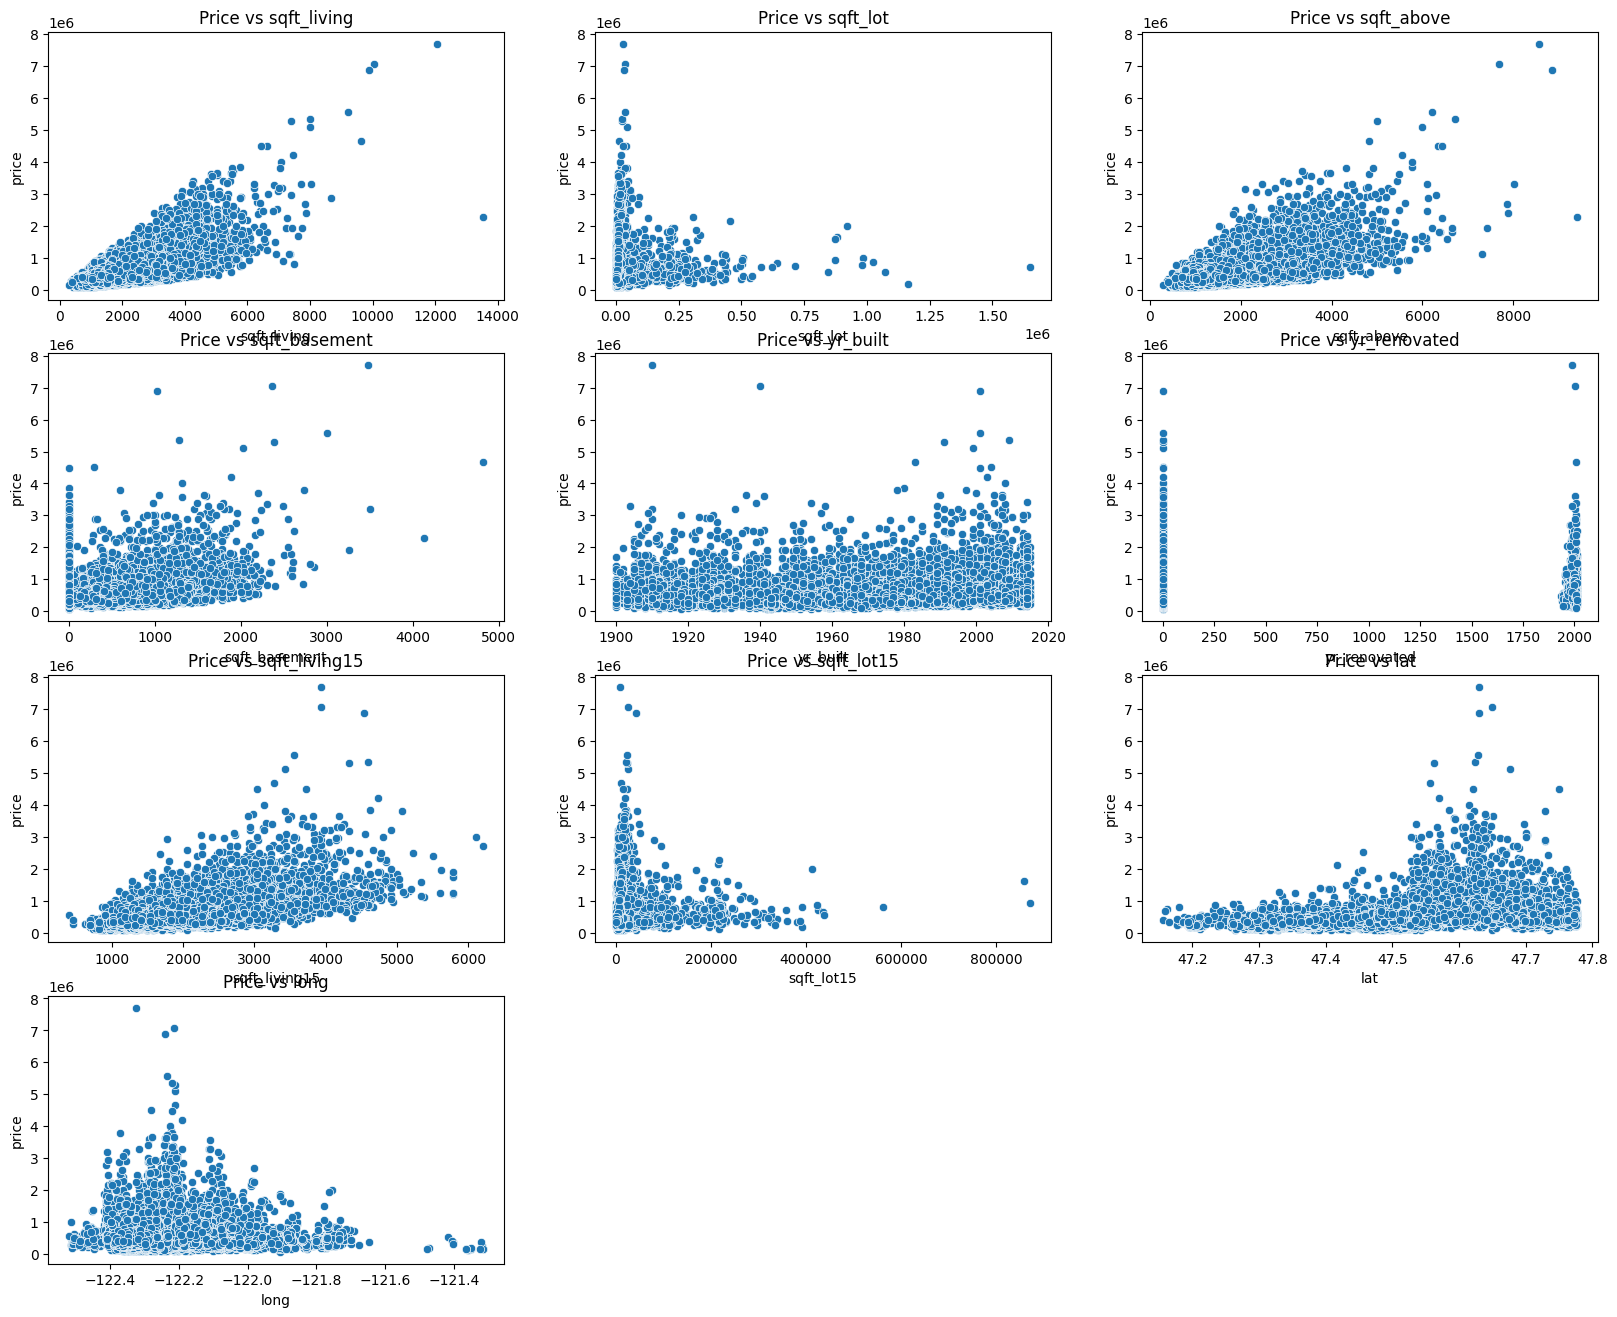

In [ ]:
numerical = ["sqft_living", "sqft_lot", "sqft_above", "sqft_basement", "yr_built", "yr_renovated", "sqft_living15", "sqft_lot15", "lat", "long"]
fig, axes = plt.subplots(4, 3, figsize = (20, 16))
axes = axes.flatten()

for i, col in enumerate(numerical):
    sns.scatterplot(df, x=col, y="price", ax=axes[i])
    axes[i].set_title(f"Price vs {col}")

for j in range(i+1, len(axes)):
    axes[j].set_visible(False)



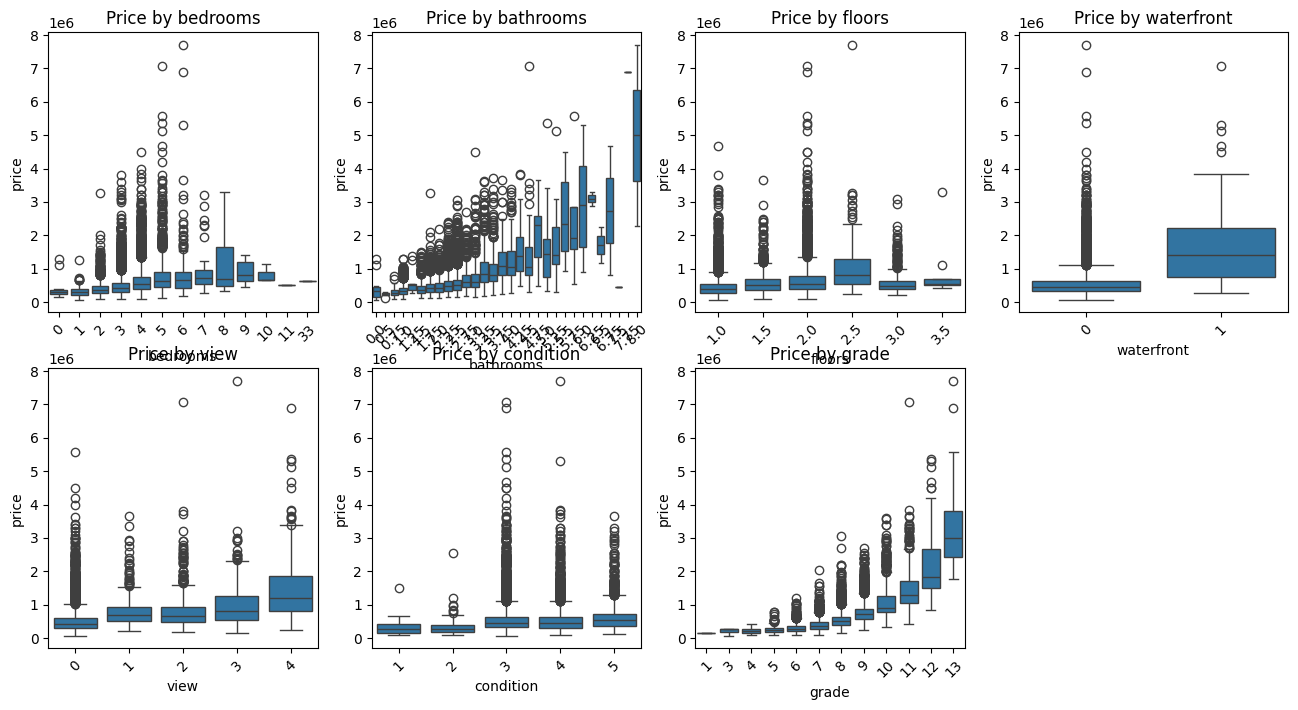

In [54]:
fig, axes = plt.subplots(2, 4, figsize=(16, 8))
axes = axes.flatten()

categories = ["bedrooms", "bathrooms", "floors", "waterfront", "view", "condition", "grade"]

for i, col in enumerate(categories):
    sns.boxplot(data=df, x=col, y="price", ax=axes[i])
    axes[i].set_title(f"Price by {col}")
    axes[i].tick_params(axis='x', rotation=45)

for j in range(i+1, len(axes)):
    axes[j].set_visible(False)

### EDA

### Feature Engineering

### Model traning